In [2]:
#hide
#default_exp viz
#default_cls_lvl 3
from nbdev.showdoc import show_doc

In [4]:
#export
from nbdev.imports import *
# from fastcore.script import *
# from fastcore.foundation import *
# from keyword import iskeyword
# import nbformat

# visualization flow

> How to manage visual assets

In [5]:
show_doc(Config, title_level=3)

<h3 id="Config" class="doc_header"><code>class</code> <code>Config</code><a href="https://github.com/fastai/fastcore/tree/master/fastcore/foundation.py#L250" class="source_link" style="float:right">[source]</a></h3>

> <code>Config</code>(**`cfg_path`**, **`cfg_name`**, **`create`**=*`None`*)

Reading and writing `ConfigParser` ini files

In [41]:
# @seaborn set1  #viz
import seaborn as sns

sns.set(
    style="white",
    palette="muted",
    color_codes=True,
    rc={"figure.figsize": (11.7, 8.27)},
)

In [42]:
# @dataset alta #dw
import pandas as pd

url = (
    "https://github.com/mattharrison/datasets/raw/master/"
    "data/alta-noaa-1980-2019.csv"
)
alta_df = pd.read_csv(url)
dates = pd.to_datetime(alta_df.DATE)
snow = alta_df.SNOW.rename(dates)
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

<AxesSubplot:ylabel='Frequency'>

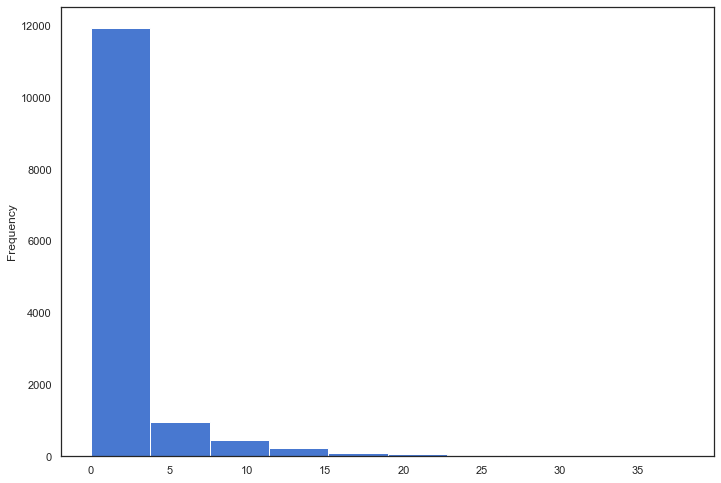

In [50]:
# ! test1.png
snow.plot.hist()

In [9]:
# exporti
from glob import glob
import os
import time
import datetime
import base64
import pandas as pd
from io import BytesIO, StringIO
from PIL import Image
from IPython.core.magic import Magics, magics_class, line_magic, cell_magic

def _getmtime_ms(path):
    mtime = os.path.getmtime(path)
    stamp = datetime.datetime.fromtimestamp(mtime, tz=datetime.timezone.utc)
    return int(round(stamp.timestamp()))

def _get_change_file(last="last.snapshot.txt", this='this.snapshot.txt'):
    if not os.path.isfile(last):
        os.system(f'touch {last}')
    nb_list = glob('*.ipynb')
    mtime = list(map(_getmtime_ms, nb_list))
    df = (pd.DataFrame(zip(nb_list, mtime), columns=["path", "mtime"])
          .sort_values(by='path')
          .to_csv(this, sep='|', index=False, header=False))
#     print(f'diff -y --suppress-common-lines {last} {this}')
    diff_ret = os.popen(f'diff -y --suppress-common-lines {last} {this}').read()
    for line in diff_ret.splitlines():
        file = line.split('|')[0].split()[-1]
        yield file
    os.rename(this, last)

@magics_class
class AssetMagics(Magics):
    """snip magic for snippets management.
    Provides the %snip magic.
    """
    @line_magic
    def sa(self, line, folder='img'):
        if not os.path.exists(folder):
            os.mkdir(folder)
        for ipynb in _get_change_file():
            print(ipynb)
            with open(ipynb) as fin:
                notebook = json.load(fin)
                for cell in notebook["cells"]:
                    if not cell["source"]:
                        continue
                    head = cell["source"][0]
                    if head.startswith("# !"):
                        oname = folder + "/" + head.lstrip("# !").strip()
                        for output in cell["outputs"]:
                            try:
                                img_png = output["data"]["image/png"]
                                im = Image.open(BytesIO(base64.b64decode(img_png)))
                                im.save(oname, "PNG")
                                print(f"-- {oname} created.")
                                break
                            except:
                                pass

def load_ipython_extension(ipython):
    ipython.register_magics(AssetMagics)

In [10]:
%sa

UsageError: Line magic function `%sa` not found.


In [68]:
!nbdev_build_lib

Converted 00_core.ipynb.
Converted 01_viz.ipynb.
Converted index.ipynb.
